# Task : In this task we have to perform EDA on titanic Dataset and to predict how many people survived.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv('./Downloads/train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.shape

(891, 12)

In [6]:
# Checking the null values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### As we can see that Age, Cabin and Embarked are the only columns which contains the null values

### Plotting the Pie chart to look at the survival percentage of the people.

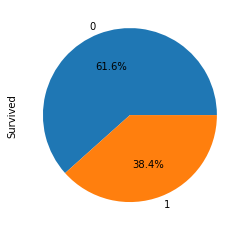

In [7]:
titanic['Survived'].value_counts().plot(kind= 'pie', autopct= '%0.1f%%')
plt.show()

#### As we know that here in the pie plot 1 denotes Survived and 0 denotes the dead so we know that only 38.4% people survived out of the total population.

### Now lets begin the EDA

### PassengerID

In [8]:
titanic['PassengerId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

#### From looking at the values in this column we can deduce that it is just serial number given to individual person standing in line and it does not affect the survial rate in any way. So, we can drop it from the dataset.

In [9]:
titanic.drop(['PassengerId'], axis= 1, inplace= True)

### Pclass

In [10]:
titanic['Pclass'].unique()

array([3, 1, 2], dtype=int64)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


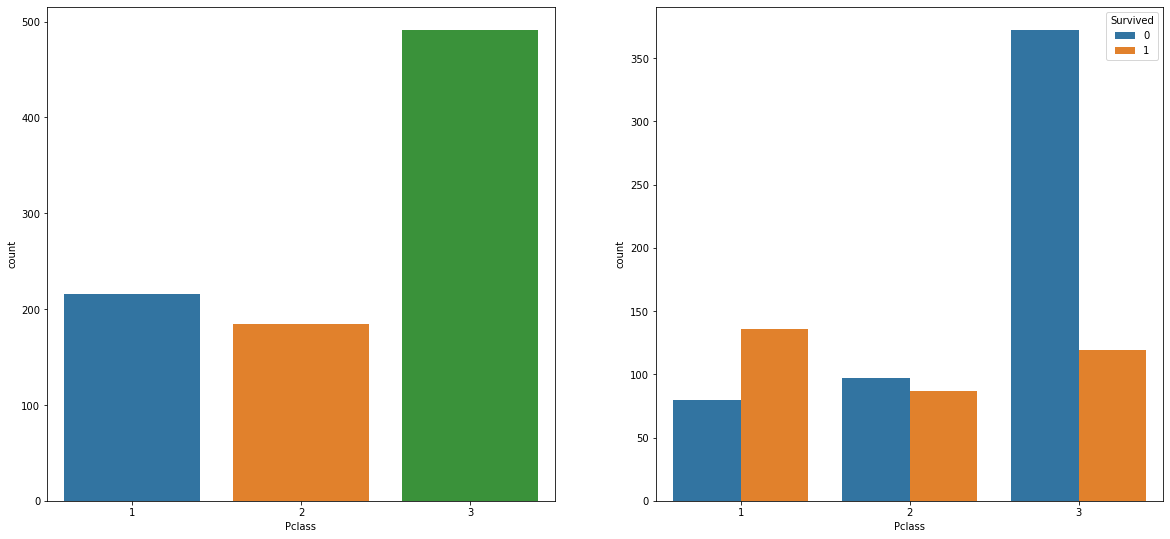

In [11]:
# plotting the Pclass
plt.figure(figsize= [20,20])
plt.subplot(221)
sns.countplot(titanic['Pclass'])
plt.subplot(222)
sns.countplot(x= 'Pclass', data= titanic, hue= 'Survived')
plt.show()

#### As we can see from the plots that most of the people on the ship are from class 3 and the most of the people who survived are class 1.

### Name

In [12]:
titanic['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

#### There are so many values in this column. We have to generalize it by extracting another feature from this feature.

In [13]:
titanic['Initial'] = 0
for i in titanic:
    titanic['Initial'] = titanic['Name'].str.extract('([A-Za-z]+)\.')

In [14]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


#### From the dataset we can see that we hace extract a new feature from the Name feature.

In [15]:
titanic['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [17]:
pd.crosstab(titanic['Initial'], titanic['Sex'], margins= True).T

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,All
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0,314
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1,577
All,1,2,1,1,7,1,1,2,40,182,2,1,517,125,1,6,1,891


In [18]:
titanic['Initial'] = titanic['Initial'].replace(['Capt','Col','Dr','Major'], 'Mr')
titanic['Initial'] = titanic['Initial'].replace(['Countess','Dr','Lady'], 'Mrs')
titanic['Initial'] = titanic['Initial'].replace(['Mlle','Mme','Ms'], 'Miss')
titanic['Initial'] = titanic['Initial'].replace(['Don','Jonkheer','Rev'], 'Others')

In [19]:
titanic['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others', 'Sir'], dtype=object)

In [20]:
titanic['Initial'] = titanic['Initial'].replace(['Sir'], 'Others')

In [22]:
titanic['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others'], dtype=object)

### Sex

In [23]:
titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


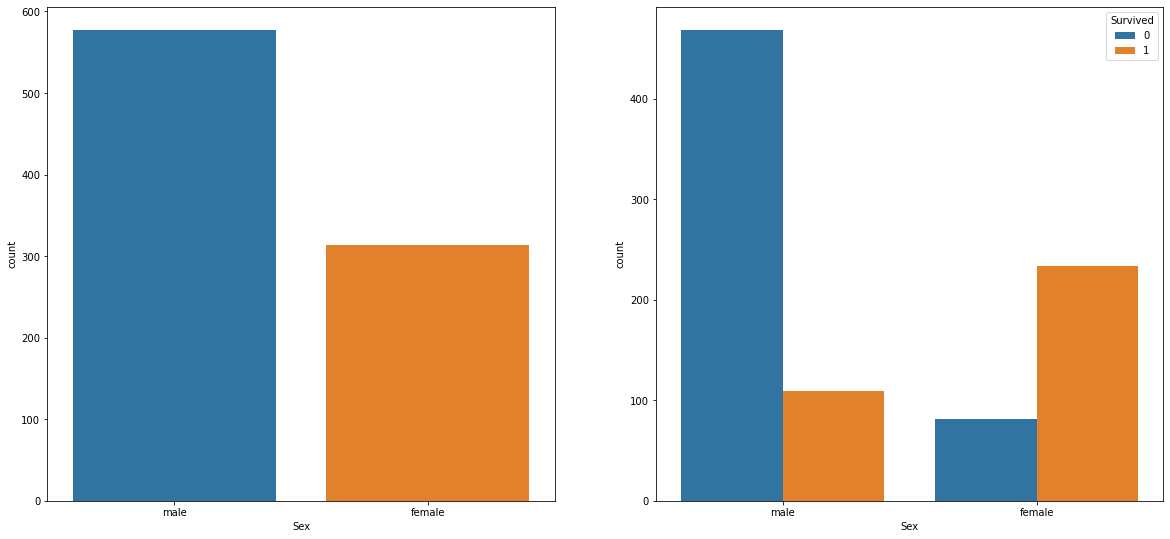

In [24]:
# plotting the graph for Sex column
plt.figure(figsize= [20,20])
plt.subplot(221)
sns.countplot(titanic['Sex'])
plt.subplot(222)
sns.countplot(x= 'Sex', data= titanic, hue= 'Survived')
plt.show()

#### From the plots we can see that out of the total population most of people present were males and most of people who survived were females.

### Age

In [25]:
titanic['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [26]:
# Using the groupby to fill the null values
titanic.groupby(['Initial'])['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.805623
Mrs       35.981818
Others    42.888889
Name: Age, dtype: float64

In [27]:
# Now filling the null values
titanic.loc[((titanic['Initial']== 'Master') & (titanic['Age'].isnull())), 'Age']= 5
titanic.loc[((titanic['Initial']== 'Miss') & (titanic['Age'].isnull())), 'Age']= 22
titanic.loc[((titanic['Initial']== 'Mr') & (titanic['Age'].isnull())), 'Age']= 32
titanic.loc[((titanic['Initial']== 'Mrs') & (titanic['Age'].isnull())), 'Age']= 36
titanic.loc[((titanic['Initial']== 'Others') & (titanic['Age'].isnull())), 'Age']= 43

In [28]:
titanic['Age'].isnull().sum()

0

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


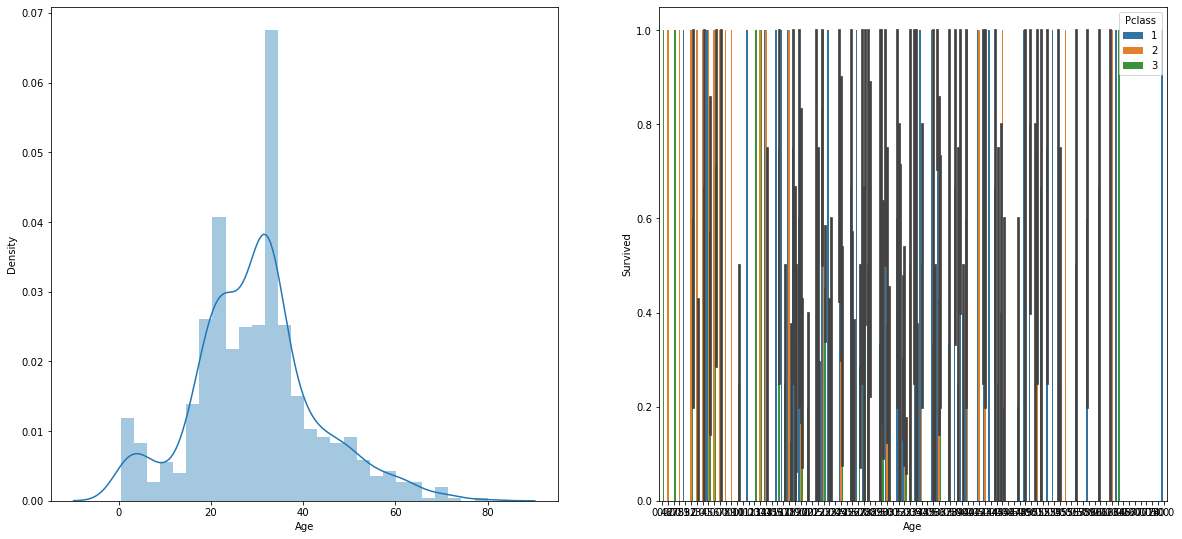

In [29]:
# plotting the the Age
plt.figure(figsize= [20,20])
plt.subplot(221)
sns.distplot(titanic['Age'])
plt.subplot(222)
sns.barplot(x= 'Age', y='Survived', data= titanic, hue= 'Pclass')
plt.show()

#### From the plotting we can see that Age is positively skewed 

### SibSp

In [30]:
titanic['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [32]:
pd.crosstab(titanic['SibSp'], titanic['Survived'], margins= True)

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


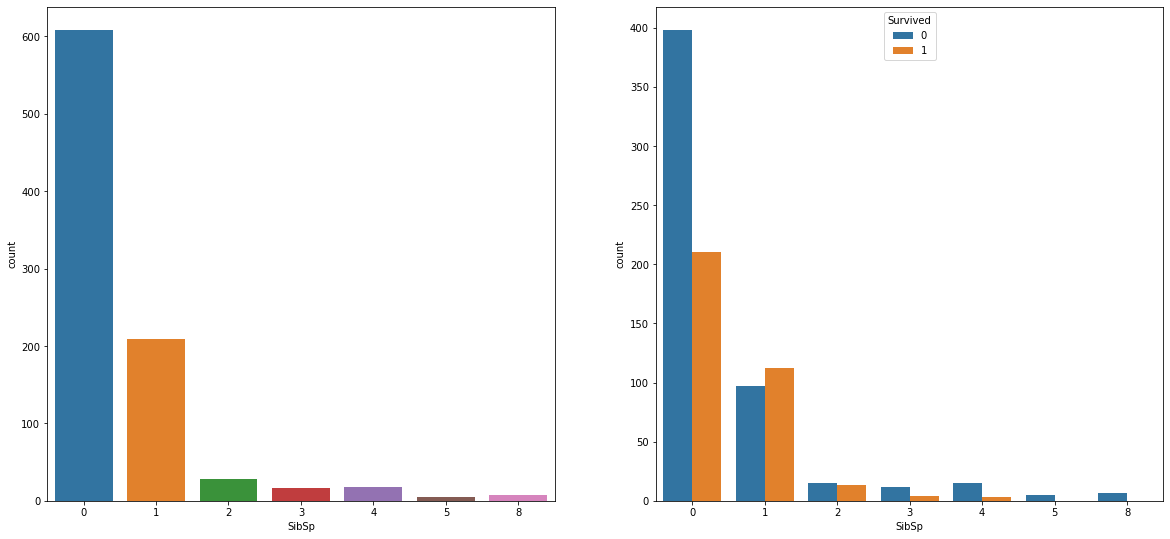

In [33]:
# plotting the SibSp
plt.figure(figsize= [20,20])
plt.subplot(221)
sns.countplot(titanic['SibSp'])
plt.subplot(222)
sns.countplot(x= 'SibSp', data= titanic, hue= 'Survived')
plt.show()

#### From plotting we can see that most of people present on the ship are without any sibling or spouse and most of the people who survived are without any sibling or spouse.

### Parch

In [34]:
titanic['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [35]:
pd.crosstab(titanic['Parch'], titanic['Survived'], margins= True)

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


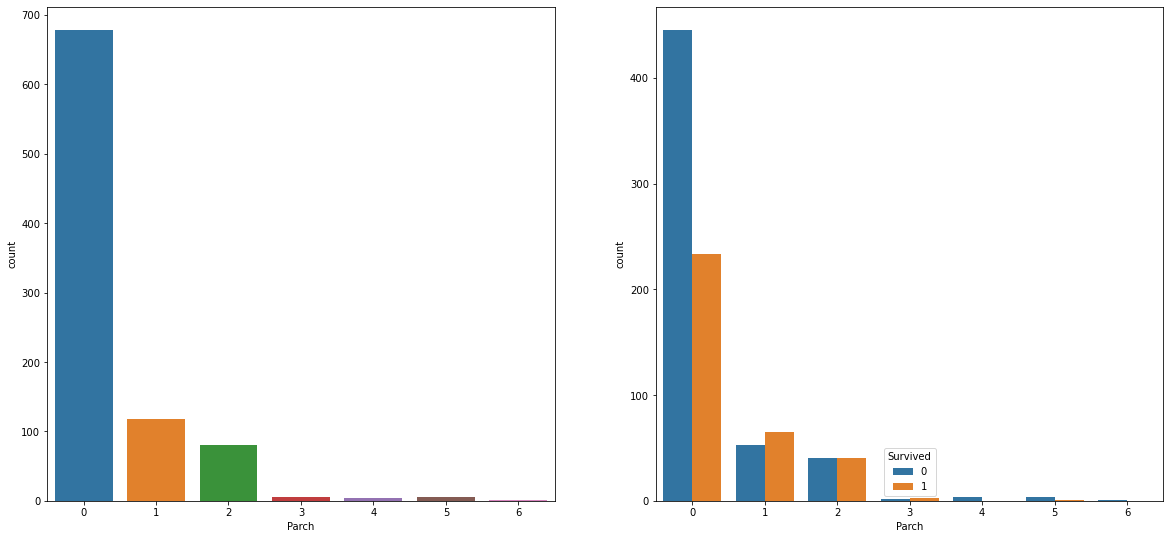

In [36]:
# plotting the Parch
plt.figure(figsize= [20,20])
plt.subplot(221)
sns.countplot(titanic['Parch'])
plt.subplot(222)
sns.countplot(x= 'Parch', data= titanic, hue= 'Survived')
plt.show()

#### From the plotting we can see that most of people present on the ship are without any parent or child and most of the people who survived are without any parent or child.

### Ticket

In [37]:
titanic['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

#### By looking at the values present in this column we can say that it does not affect the survival rate in any way. So we can say that it can be dropped.

In [38]:
titanic.drop(['Ticket'], axis= 1, inplace= True)

### Fare

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


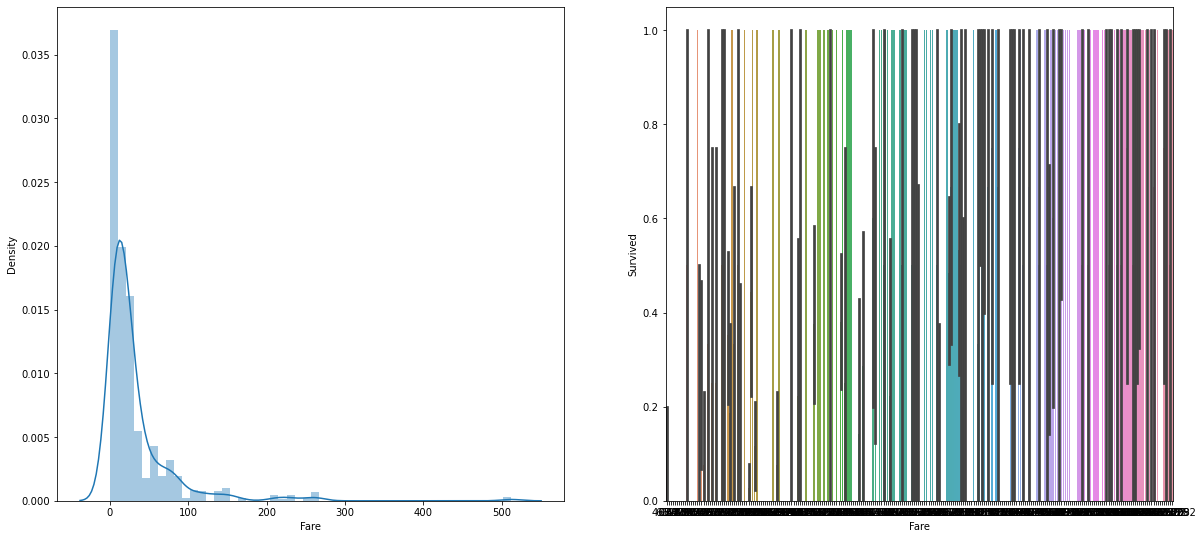

In [39]:
# plotting the Fare
plt.figure(figsize= [20,20])
plt.subplot(221)
sns.distplot(titanic['Fare'])
plt.subplot(222)
sns.barplot(x= 'Fare', y= 'Survived', data= titanic)
plt.show()

#### We can see from the plotting that Fare is positively skewed

### Cabin

In [40]:
titanic['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [41]:
titanic['Cabin'].isnull().sum()

687

#### There are so many null values present in it and it does not affect survival rate in any way as it already done by Pclass column

In [42]:
titanic.drop(['Cabin'], axis= 1, inplace= True)

### Embarked

In [43]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [44]:
titanic['Embarked'].mode()

0    S
dtype: object

In [46]:
titanic['Embarked'].fillna('S', inplace= True)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


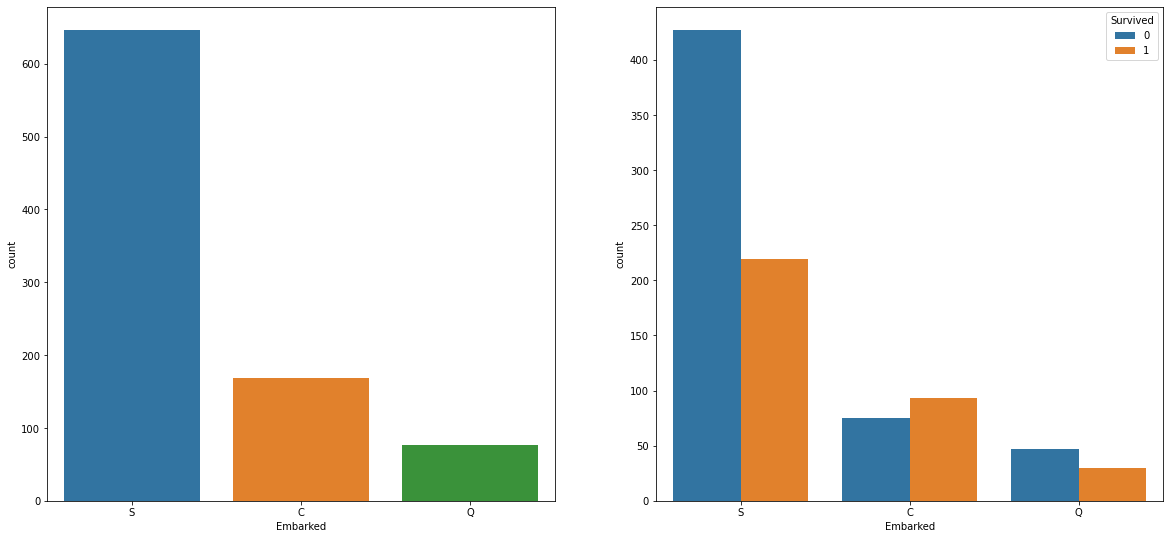

In [47]:
# plotting the Embarked
plt.figure(figsize= [20,20])
plt.subplot(221)
sns.countplot(titanic['Embarked'])
plt.subplot(222)
sns.countplot(x= 'Embarked', data= titanic, hue= 'Survived')
plt.show()

#### From looking at the plot we can see that most of people embarked from S and most of the people survived embarked from S.

### Now creating and adding 2 new features in the dataset

In [48]:
titanic['Family_size'] = titanic['SibSp'] + titanic['Parch']
titanic['Alone'] = 0
for j in titanic:
    titanic.loc[titanic['Family_size']== 0, 'Alone']= 1

In [49]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,Family_size,Alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,0,1


#### Now dropping the Name Column as initial can do inplace of it.

In [50]:
titanic.drop(['Name'], axis= 1, inplace= True)

In [51]:
# checking the columns datatype
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
 8   Initial      891 non-null    object 
 9   Family_size  891 non-null    int64  
 10  Alone        891 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


#### Changing the object datatype into float or int datatype

In [52]:
titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [53]:
titanic['Sex'] = titanic['Sex'].replace(['male','female'],[0,1])

In [54]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [55]:
titanic['Embarked'] = titanic['Embarked'].replace(['S','C','Q'],[0,1,2])

In [56]:
titanic['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others'], dtype=object)

In [57]:
titanic['Initial'] = titanic['Initial'].replace(['Mr','Mrs','Miss','Master','Others'],[0,1,2,3,4])

In [58]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    int64  
 8   Initial      891 non-null    int64  
 9   Family_size  891 non-null    int64  
 10  Alone        891 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 76.7 KB


### Now applying the different models

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import metrics

In [60]:
lr = LogisticRegression()
dtree = DecisionTreeClassifier(criterion= 'entropy')
rfc = RandomForestClassifier(criterion= 'entropy')
vot = VotingClassifier(estimators= [('rfc', RandomForestClassifier(criterion= 'entropy')),
                                   ('lr', LogisticRegression()),
                                   ('dtree', DecisionTreeClassifier(criterion= 'entropy'))])

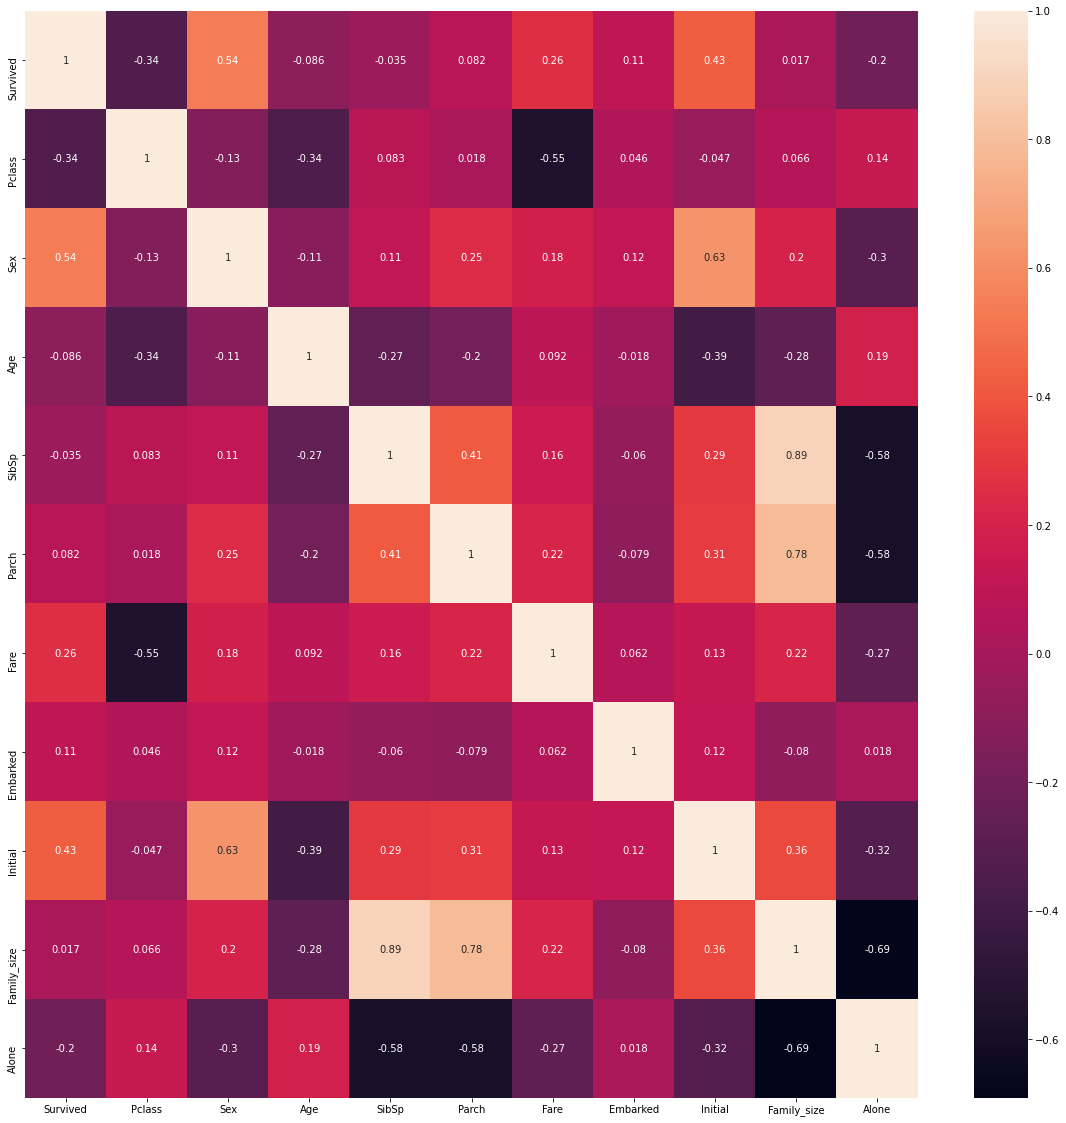

In [62]:
# looking at the heatmap
plt.figure(figsize= [20,20])
sns.heatmap(titanic.corr(), annot= True)
plt.show()

#### By looking at the heatmap we can see that columns like Alone, Initial, Embarked, Fare, Sex and Pclass have high correlation with target column (Survived)

In [63]:
# Splitting the data
X = titanic.drop(['Survived'], axis= 1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state= 1)

In [64]:
# Apllying the logistic regression
pred1 = lr.fit(X_train, y_train).predict(X_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
metrics.cohen_kappa_score(y_test, pred1)

0.5764571814459967

In [66]:
metrics.confusion_matrix(y_test, pred1)

array([[115,  13],
       [ 32,  63]], dtype=int64)

In [67]:
metrics.precision_score(y_test, pred1)

0.8289473684210527

In [68]:
# Applying the Decision tree model
pred2 = dtree.fit(X_train, y_train).predict(X_test)

In [69]:
metrics.cohen_kappa_score(y_test, pred2)

0.4994180246092451

In [70]:
metrics.confusion_matrix(y_test, pred2)

array([[105,  23],
       [ 31,  64]], dtype=int64)

In [71]:
metrics.precision_score(y_test, pred2)

0.735632183908046

In [72]:
# Applying the Random Forrest model
pred3 = rfc.fit(X_train, y_train).predict(X_test)

In [73]:
metrics.cohen_kappa_score(y_test, pred3)

0.5362251177793813

In [74]:
metrics.confusion_matrix(y_test, pred3)

array([[115,  13],
       [ 36,  59]], dtype=int64)

In [75]:
metrics.precision_score(y_test, pred3)

0.8194444444444444

In [76]:
# Applying the Voting model
pred4 = vot.fit(X_train, y_train).predict(X_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
metrics.cohen_kappa_score(y_test, pred4)

0.5664412510566357

In [78]:
metrics.confusion_matrix(y_test, pred4)

array([[115,  13],
       [ 33,  62]], dtype=int64)

In [79]:
metrics.precision_score(y_test, pred4)

0.8266666666666667

#### So by looking at all the models from the above we can see that Logistic regression model would be the best out of all the model  as its cohen kappa score it best out of all the four models applied above and cohen kappa score tells model's predictive power.

#### Hence the task has been completed.